In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Загрузка файла HR.csv в pandas dataframe

In [ ]:
df_hr = pd.read_csv('HR.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчет основных статистик для переменных

In [ ]:
# mean - среднее
# 50% - медиана
# min - минимум
# max - максимум
# std - стандартное отклонение
# mode - мода

df_describe = pd.concat(
    [df_hr.describe(percentiles=[0.5]),
     df_hr.mode().rename(index={0: 'mode'}).iloc[:1]]).drop(
        index=['count'], columns=['department', 'salary'])
df_describe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


# 3. Расчет и визуализация корреляционной матрицы для количественных переменных

In [ ]:
df_corr = df_hr.corr(numeric_only=True)
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

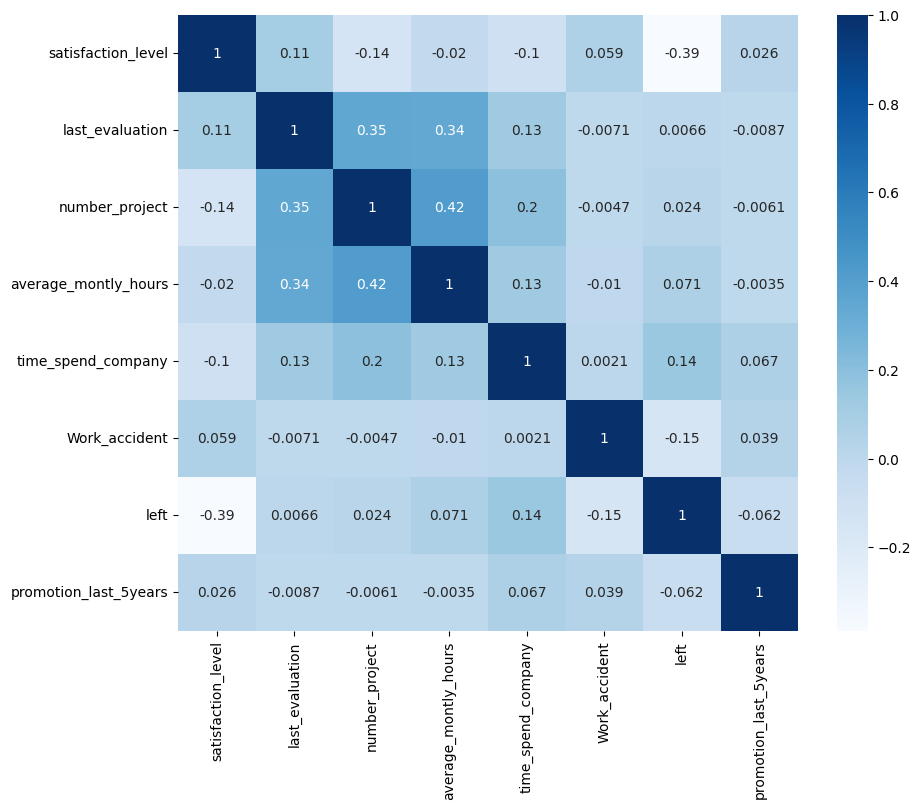

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_hr.corr(numeric_only=True), annot=True, cmap='Blues')

In [ ]:
df_corr_sort = df_corr.unstack().sort_values(key=abs).reset_index().rename(columns={0: 'value'})
df_corr_sort = df_corr_sort.loc[df_corr_sort['level_0'] != df_corr_sort['level_1']].drop_duplicates(subset='value', keep='first')

def get_corr_coef(df, coef_sign, coef_count=2):
  for i in range(coef_count):
    print(list(df.iloc[i + coef_sign * coef_count]))

print('Две наименее скоррелированные переменные:\n')
get_corr_coef(df_corr_sort, 0, 2)
print('\nДве самые скоррелированные переменные:\n')
get_corr_coef(df_corr_sort, -1, 2)

Две наименее скоррелированные переменные:

['Work_accident', 'time_spend_company', 0.0021204180967097077]
['average_montly_hours', 'promotion_last_5years', -0.0035444142929947717]

Две самые скоррелированные переменные:

['left', 'satisfaction_level', -0.3883749834241161]
['number_project', 'average_montly_hours', 0.41721063440177986]


**Самые скоррелированные переменные:**

1. Корреляция между количеством проектов и средним количеством часов на рабочем месте в месяц имеет максимальное значение (0.42), она прямая, но все равно достаточно слабая (< 0.5).

2. Корреляция между уровнем удовлетворенности работой и увольнением сотрудника обратная и слабая (-0.39).

**Наименее скоррелированные переменные:**

1. Корреляция между наличием несчастных случаев на рабочем месте и стажем работы в компании имеет наименьшее значение (0.002).

2. Корреляция между средним количеством часов на рабочем месте в месяц и наличием повышения за последние пять лет так же имеет небольшое значение -0.0035.

# 4. Расчет количества сотрудников для каждого департамента

In [ ]:
df_departments = df_hr['department'].value_counts().reset_index()
df_departments

,index,department
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


# 5. Распределение сотрудников по зарплатам

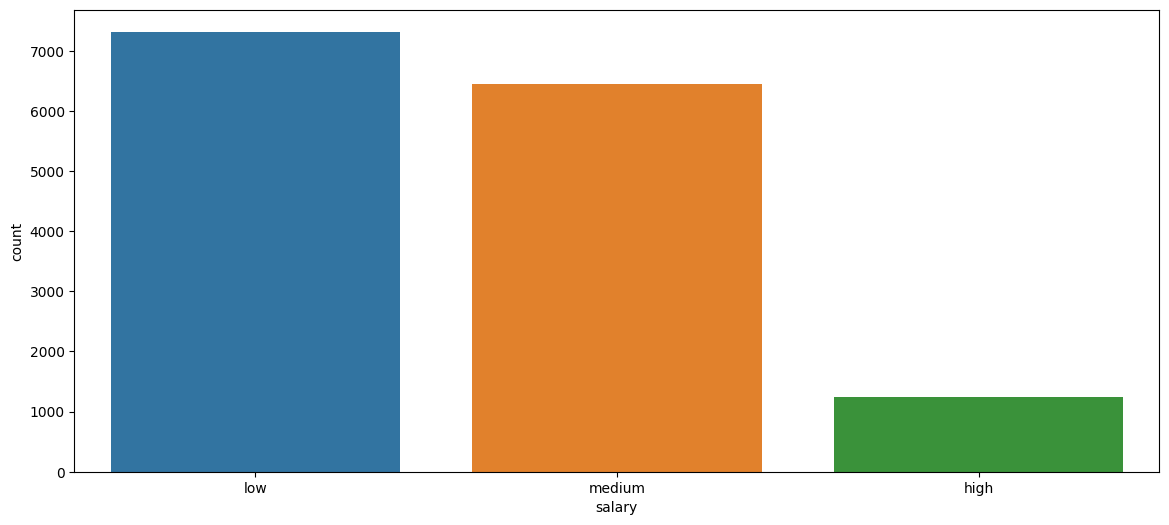

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x ='salary', data = df_hr)
plt.show()

Из графика видно, что больше всего сотрудников с низкой зарплатой. Меньше всего - с высокой.

Доплнительно можно указать группировку по департаменту:

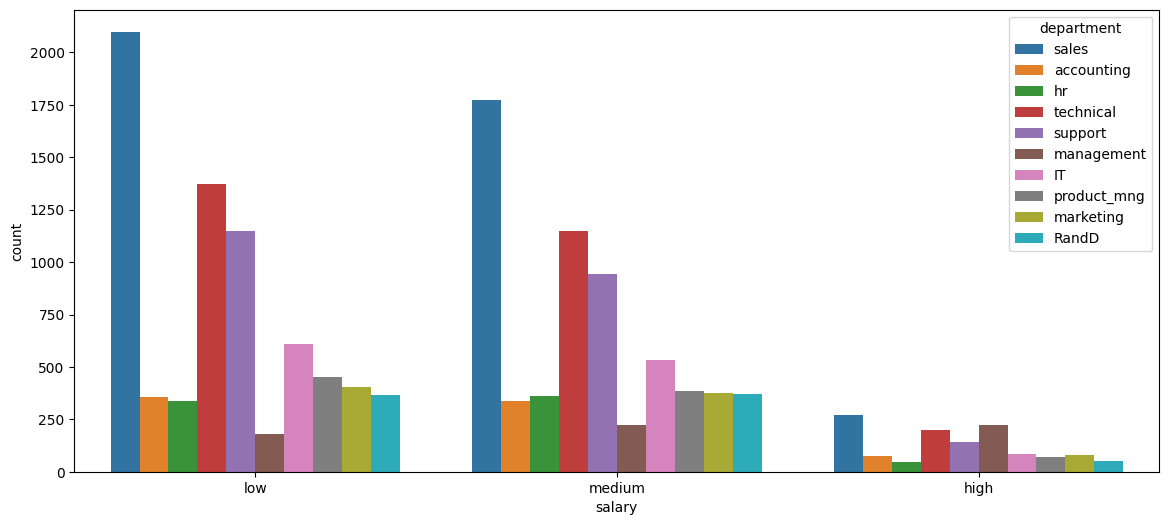

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x ='salary', data = df_hr, hue='department')
plt.show()

# 6. Распределение сотрудников по зарплатам в каждом департаменте по отдельности

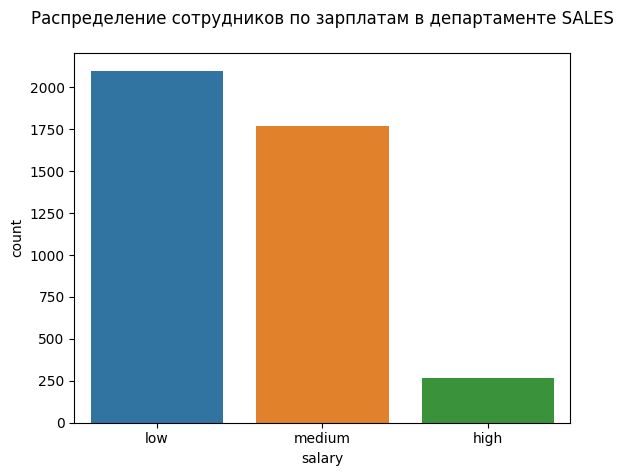

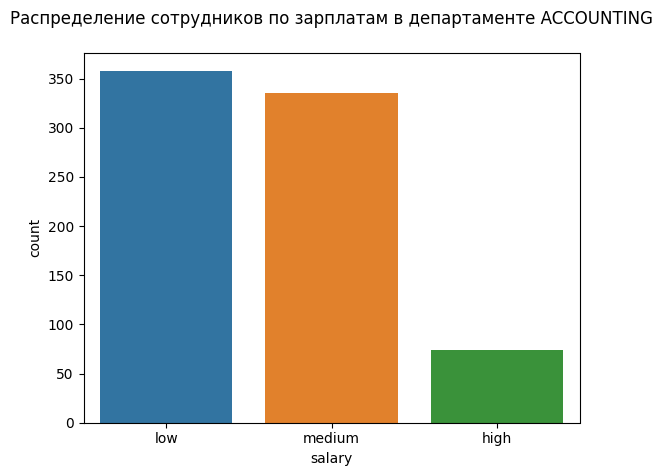

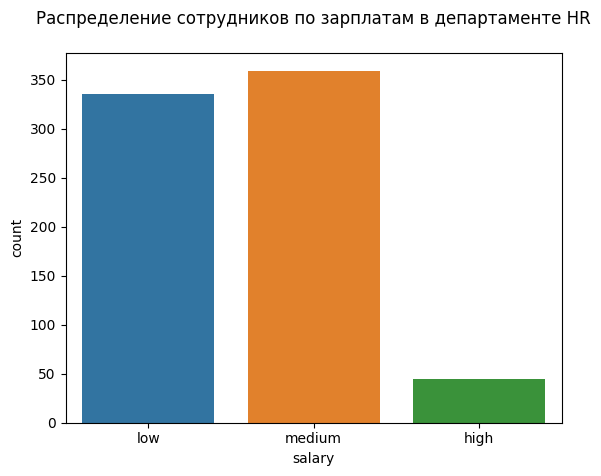

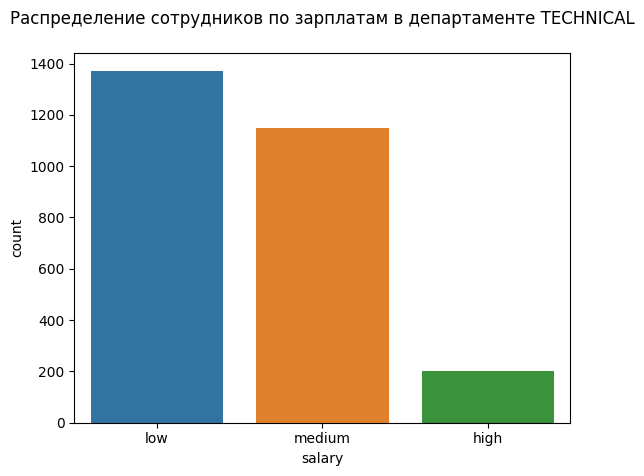

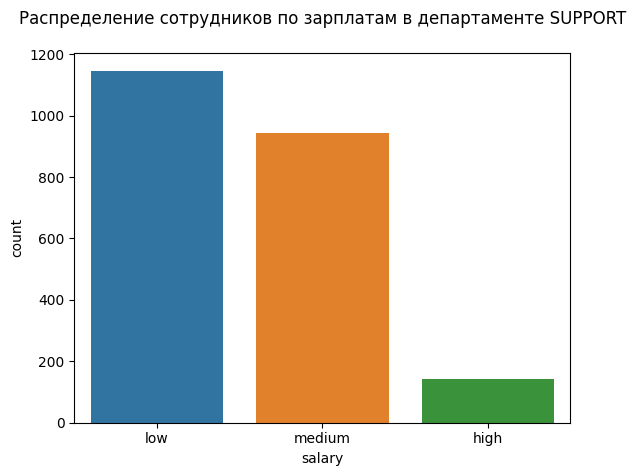

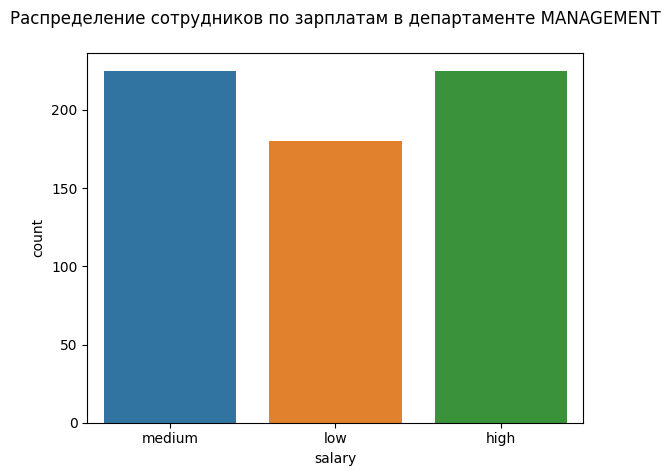

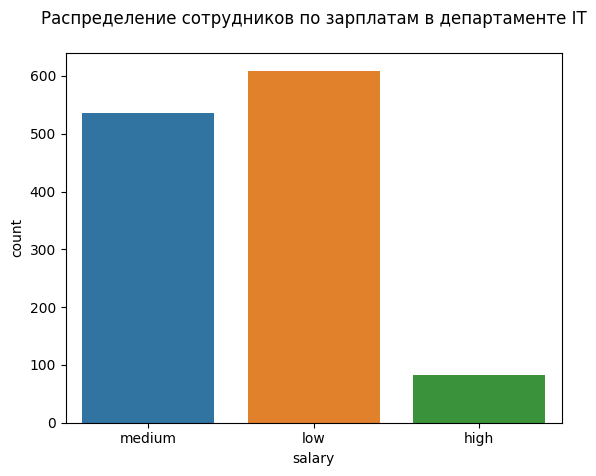

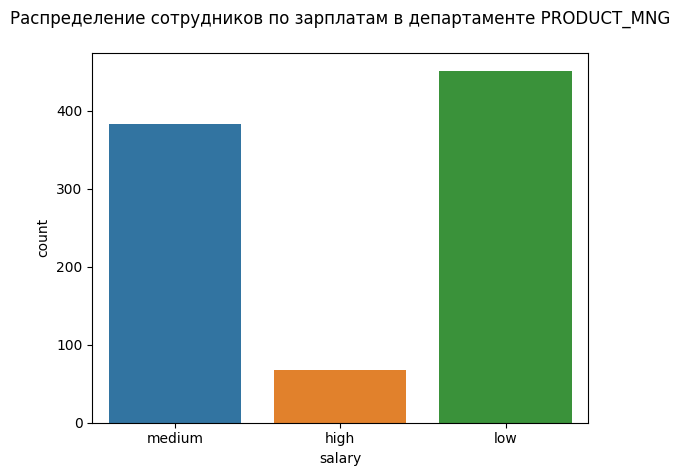

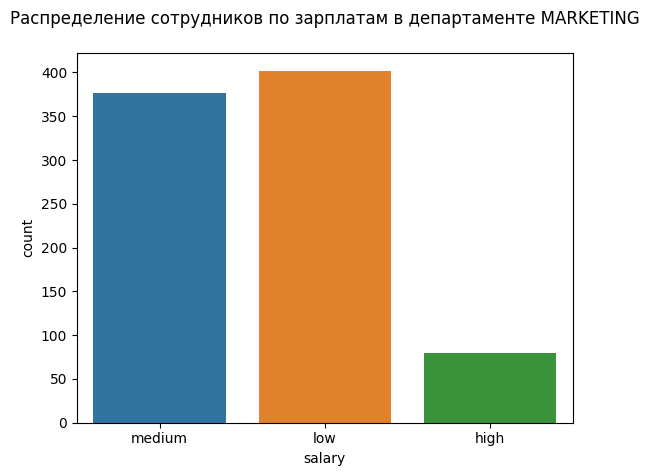

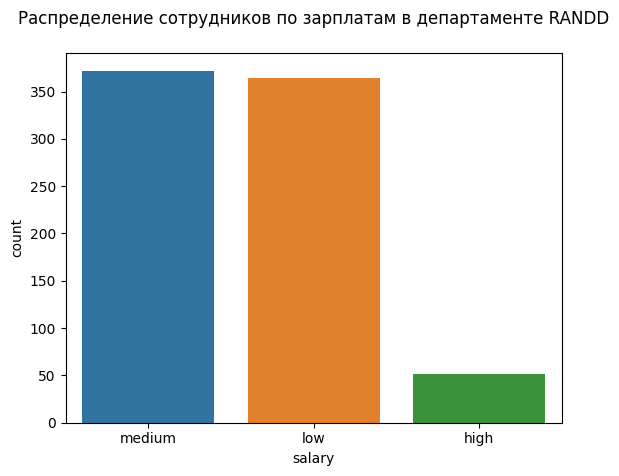

In [ ]:
for dep in df_hr['department'].unique():
  sns.countplot(x ='salary', data = df_hr.loc[df_hr['department'] == dep])
  plt.title(f'Распределение сотрудников по зарплатам в департаменте {dep.upper()}\n')
  plt.show()

Из графиков можно сделать выводы:

- в департаментах SALES, ACCOUNTING, TECHNICAL, SUPPORT, IT, PRODUCT_MNG больше сострудников с низким уровнем зарплаты.
- в департаменте HR больше сострудников со средним уровнем зарплаты.
- в департаменте MARKETING преимущественно высокие зарплаты.
- в департаменте MANAGEMENT больше сотрудников с высоким и средним уровнями зарплаты. И в целом, нет сильной разницы между распределениями по уровню зарплаты.
- в департаменте RANDD больше сотрудников с низким и средним уровнями зарплаты.


# 7. Проверка гипотезы
Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Гипотезы:

- H0: Сотрудники с высоким окладом и сотрудники с низким окладом проводят на работе одинаковое количество времени.
- H1: Сотрудники с высоким окладом и сотрудники с низким окладом проводят на работе разное количество времени.

Пороговый уровень статистической значимости:

- α = 0.05

In [ ]:
df_high = df_hr.loc[df_hr['salary'] == 'high']
df_low = df_hr.loc[df_hr['salary'] == 'low']

Проверка равенства дисперсий:

In [ ]:
def f_test(x, y):
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p = 1-stats.f.cdf(f, nun, dun)
    return f, p

In [ ]:
stat, p = f_test(df_high['average_montly_hours'],
                 df_low['average_montly_hours'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны')
else:
  print('Отклоняем нулевую гипотезу, дисперсии, вероятно, не равны')

Статистика = 0.8809451921406246
p = 0.9978847408741031

Не отклоняем нулевую гипотезу, дисперсии, вероятно, равны


In [ ]:
stat, p = stats.ttest_ind(df_high['average_montly_hours'],
                          df_low['average_montly_hours'])

print(f'Статистика = {stat}\np = {p}\n')

if p > 0.05:
  print('Не отклоняем нулевую гипотезу')
else:
  print('Отклоняем нулевую гипотезу')

Статистика = -0.7288680398062308
p = 0.4661023478267259

Не отклоняем нулевую гипотезу


Т-тест для двух выборок показал значение p-value > 0.05.

Поэтому не отклоняем нулевую гипотезу о том, что сотрудники с высоким окладом и сотрудники с низким окладом проводят на работе одинаковое количество времени (нет статистически значимой разницы между средним временем на работе).

In [ ]:
mean_h = df_high['average_montly_hours'].mean()
mean_l = df_low['average_montly_hours'].mean()

print(f'Среднее время, проведенное на работе сотрудниками с высоким окладом: {mean_h}')
print(f'Среднее время, проведенное на работе сотрудниками с низким окладом: {mean_l}')

Среднее время, проведенное на работе сотрудниками с высоким окладом: 199.86742118027485
Среднее время, проведенное на работе сотрудниками с низким окладом: 200.9965828321487


Расчет среднего времени для сотрудников с высоким окладом и для сотрудников с низким окладом показал значения 200 и 201 часов, соотвественно

# 8. Расчет показателей среди уволившихся и не уволившихся сотрудников

In [ ]:
df_hr['left'].unique()

array([1, 0])

In [ ]:
df_left = df_hr.loc[df_hr['left'] == 1]
df_not_left = df_hr.loc[df_hr['left'] == 0]

## 8.1. Доля сотрудников с повышением за последние 5 лет

In [ ]:
print(f"Для уволившихся сотрудников: {round(df_left['promotion_last_5years'].mean() * 100, 2)}%")
print(f"Для не уволившихся сотрудников: {round(df_not_left['promotion_last_5years'].mean() * 100, 2)}%")

Для уволившихся сотрудников: 0.53%
Для не уволившихся сотрудников: 2.63%


Отличается в 5 раз (в пользу не уволившихся сотрудников).

## 8.2. Средняя степень удовлетворенности

In [ ]:
print(f"Для уволившихся сотрудников: {df_left['satisfaction_level'].mean()}")
print(f"Для не уволившихся сотрудников: {df_not_left['satisfaction_level'].mean()}")

Для уволившихся сотрудников: 0.4400980117614114
Для не уволившихся сотрудников: 0.666809590479524


Средняя степень удовлетворенности у не уволившихся сотрудников выше, что ожидаемо.

## 8.3. Среднее количество проектов

In [ ]:
print(f"Для уволившихся сотрудников: {df_left['number_project'].mean()}")
print(f"Для не уволившихся сотрудников: {df_not_left['number_project'].mean()}")

Для уволившихся сотрудников: 3.8555026603192384
Для не уволившихся сотрудников: 3.786664333216661


Здесь примерно одинаково.

# 9. Построение модели LDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
X = df_hr[['satisfaction_level', 'last_evaluation', 'number_project',
           'average_montly_hours', 'time_spend_company', 'Work_accident',
           'promotion_last_5years']]
y = df_hr['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lda = LogisticRegression(max_iter=1000)
lda.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(f'{lda.coef_}\n{lda.intercept_}')

[[-4.12520455  0.73346093 -0.29973258  0.00478861  0.22358722 -1.45724041
  -1.61602466]]
[0.13274705]


In [ ]:
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.to_numpy()

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: -0.3522157815313258
MAE: 0.24333333333333335
MSE: 0.24333333333333335
RMSE: 0.49328828623162474


Коэффициент детерминации = -0.35.

Т.е. обученная модель прогнозирует хуже чем модель по средним (ошибка модели простого среднего меньше ошибки регрессионной модели).

In [ ]:
result = pd.DataFrame([y_test.to_numpy(), y_pred]).T
print(f'{round(accuracy_score(y_test, y_pred) * 100)}% ({len(result.loc[result[0] != result[1]])}/{len(result)})')

76% (730/3000)


Точность = 76%, модель предсказала невозное значение left для 730 сотрудников из 3000.

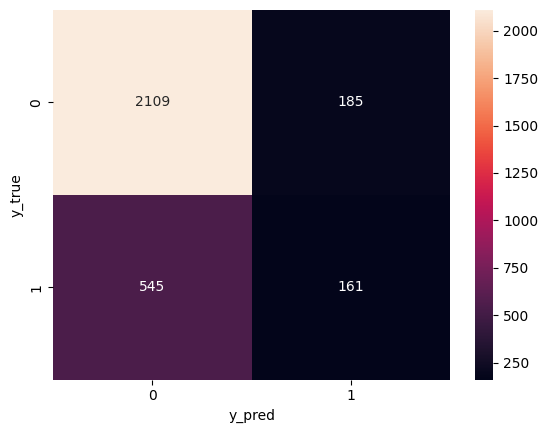

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<Axes: >

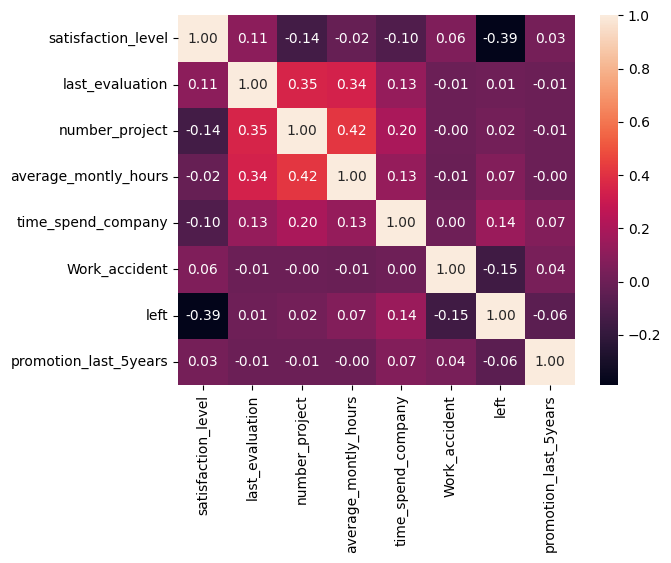

In [ ]:
sns.heatmap(df_hr.corr(numeric_only=True), annot = True, fmt = ".2f")

Матрица корреляции показывает, что для признака left нет ни одного признака взаимосвязь с которым была бы значимой.

Максимальное значение -0.39 для признака satisfaction_level, что означает умеренную связь. Можно построить модель только на основе этого показателя:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_hr[['satisfaction_level']], df_hr['left'], test_size=0.2, random_state=42)

lda = LogisticRegression(max_iter=1000)
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

In [ ]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

result = pd.DataFrame([y_test.to_numpy(), y_pred]).T
print(f'\nТочность = {round(accuracy_score(y_test, y_pred) * 100)}% ({len(result.loc[result[0] != result[1]])}/{len(result)})')

R2: -0.36332988384528186
MAE: 0.24533333333333332
MSE: 0.24533333333333332
RMSE: 0.4953113498935123

Точность = 75% (736/3000)


Коэффициент детерминации = -0.36.

Т.е. и эта обученная модель прогнозирует хуже чем модель по средним (ошибка модели простого среднего меньше ошибки регрессионной модели).

Линейная зависимость между увольнением сотрудника и остальными факторами отсутствует, либо носит нелинейный характер.